In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.shape

(545, 13)

In [4]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [8]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: xlabel='area', ylabel='price'>

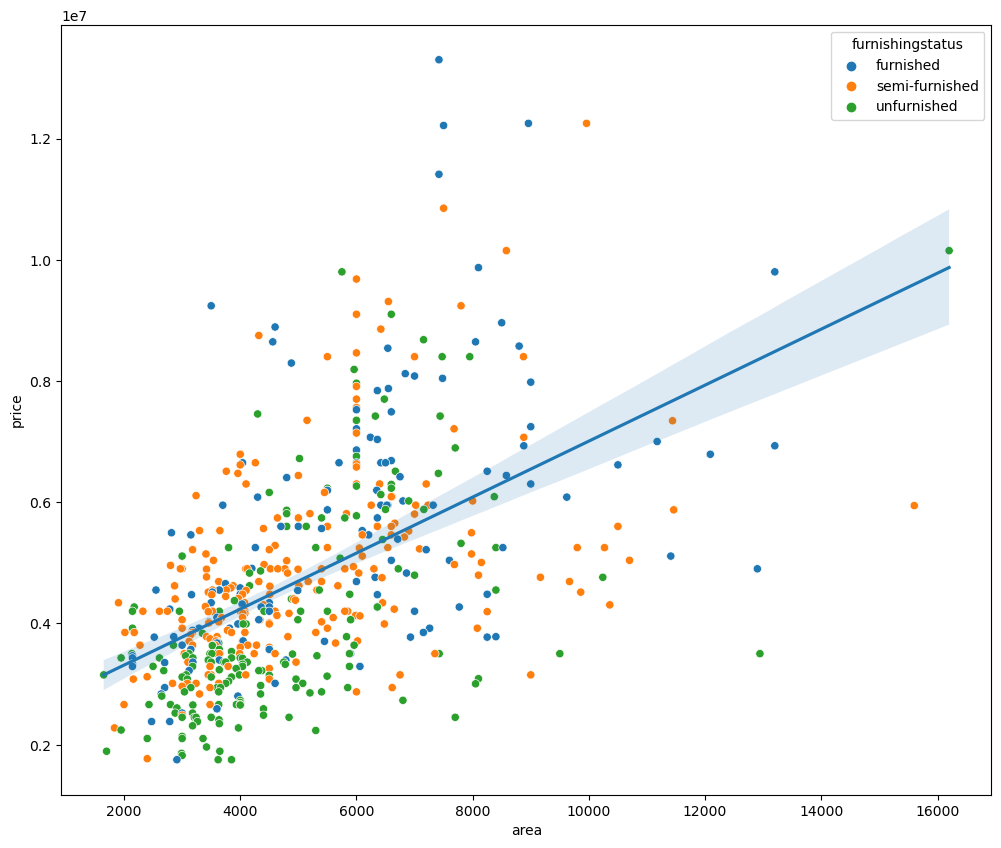

In [9]:
plt.figure(figsize=(12,10))
sb.scatterplot(x='area',y='price',data=data,hue='furnishingstatus')
sb.regplot(x='area',y='price',data=data,scatter=False)

<Axes: >

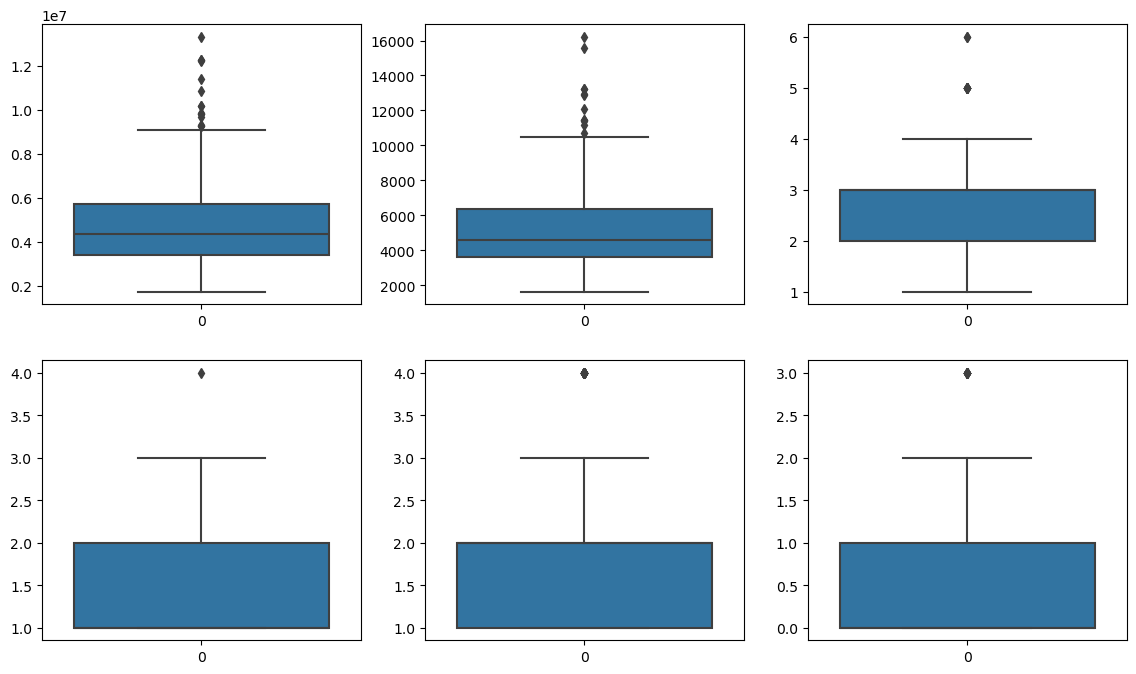

In [10]:
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(14,8))
sb.boxplot(data['price'],ax=axs[0,0])
sb.boxplot(data['area'],ax=axs[0,1])
sb.boxplot(data['bedrooms'],ax=axs[0,2])
sb.boxplot(data['bathrooms'],ax=axs[1,0])
sb.boxplot(data['stories'],ax=axs[1,1])
sb.boxplot(data['parking'],ax=axs[1,2])

In [11]:
q1_pr=np.percentile(data['price'],25)
q2_pr=np.percentile(data['price'],75)
iqr_pr=q2_pr-q1_pr
lower_pr=q1_pr - 1.5*iqr_pr
upper_pr=q2_pr + 1.5*iqr_pr
data=data[(data['price']>=lower_pr) & (data['price']<=upper_pr)]

In [12]:
q1_ar=np.percentile(data['area'],25)
q2_ar=np.percentile(data['area'],75)
iqr_ar=q2_ar-q1_ar
lower_ar=q1_ar-1.5*iqr_ar
upper_ar=q2_ar+1.5*iqr_ar
data=data[(data['area']>=lower_ar) & (data['area']<=upper_ar)]

In [13]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [14]:
cat=data.select_dtypes(exclude='int')
cat.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [15]:
data['hotwaterheating'].value_counts()

hotwaterheating
no     495
yes     22
Name: count, dtype: int64

<Axes: >

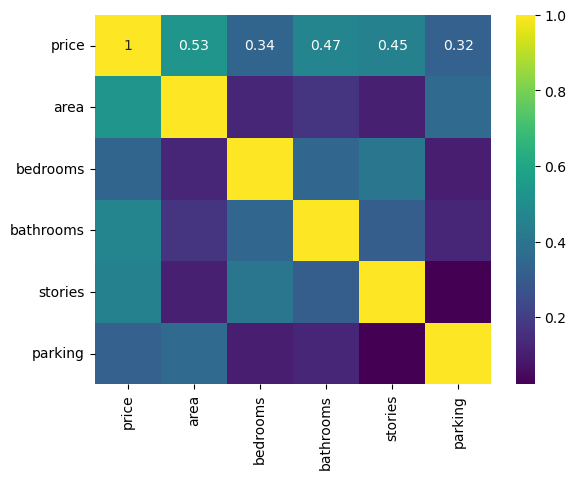

In [16]:
num_data=data.drop(cat.columns,axis=1)
cor=num_data.corr()
sb.heatmap(cor,annot=True,cmap='viridis')

<Axes: xlabel='area', ylabel='price'>

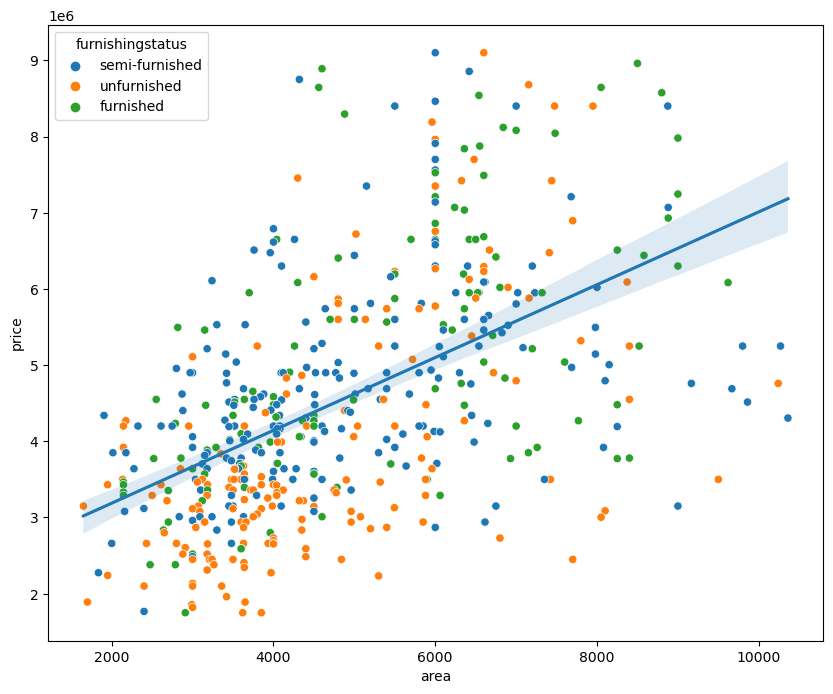

In [17]:
plt.figure(figsize=(10,8))
sb.scatterplot(y='price',x='area',data=data,hue='furnishingstatus')
sb.regplot(y='price',x='area',data=data,scatter=False)

<Axes: xlabel='parking', ylabel='Density'>

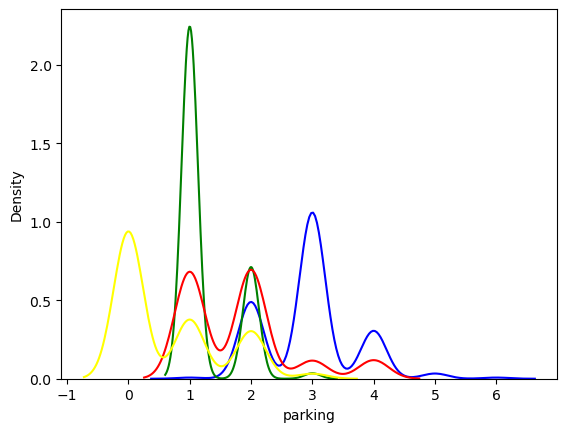

In [18]:
sb.distplot(data['bedrooms'],hist=False,color='blue', label='Bedrooms')
sb.distplot(data['bathrooms'],hist=False,color='green', label='Bathrooms')
sb.distplot(data['stories'],hist=False,color='red', label='Stories')
sb.distplot(data['parking'],hist=False,color='yellow', label='Parkings')

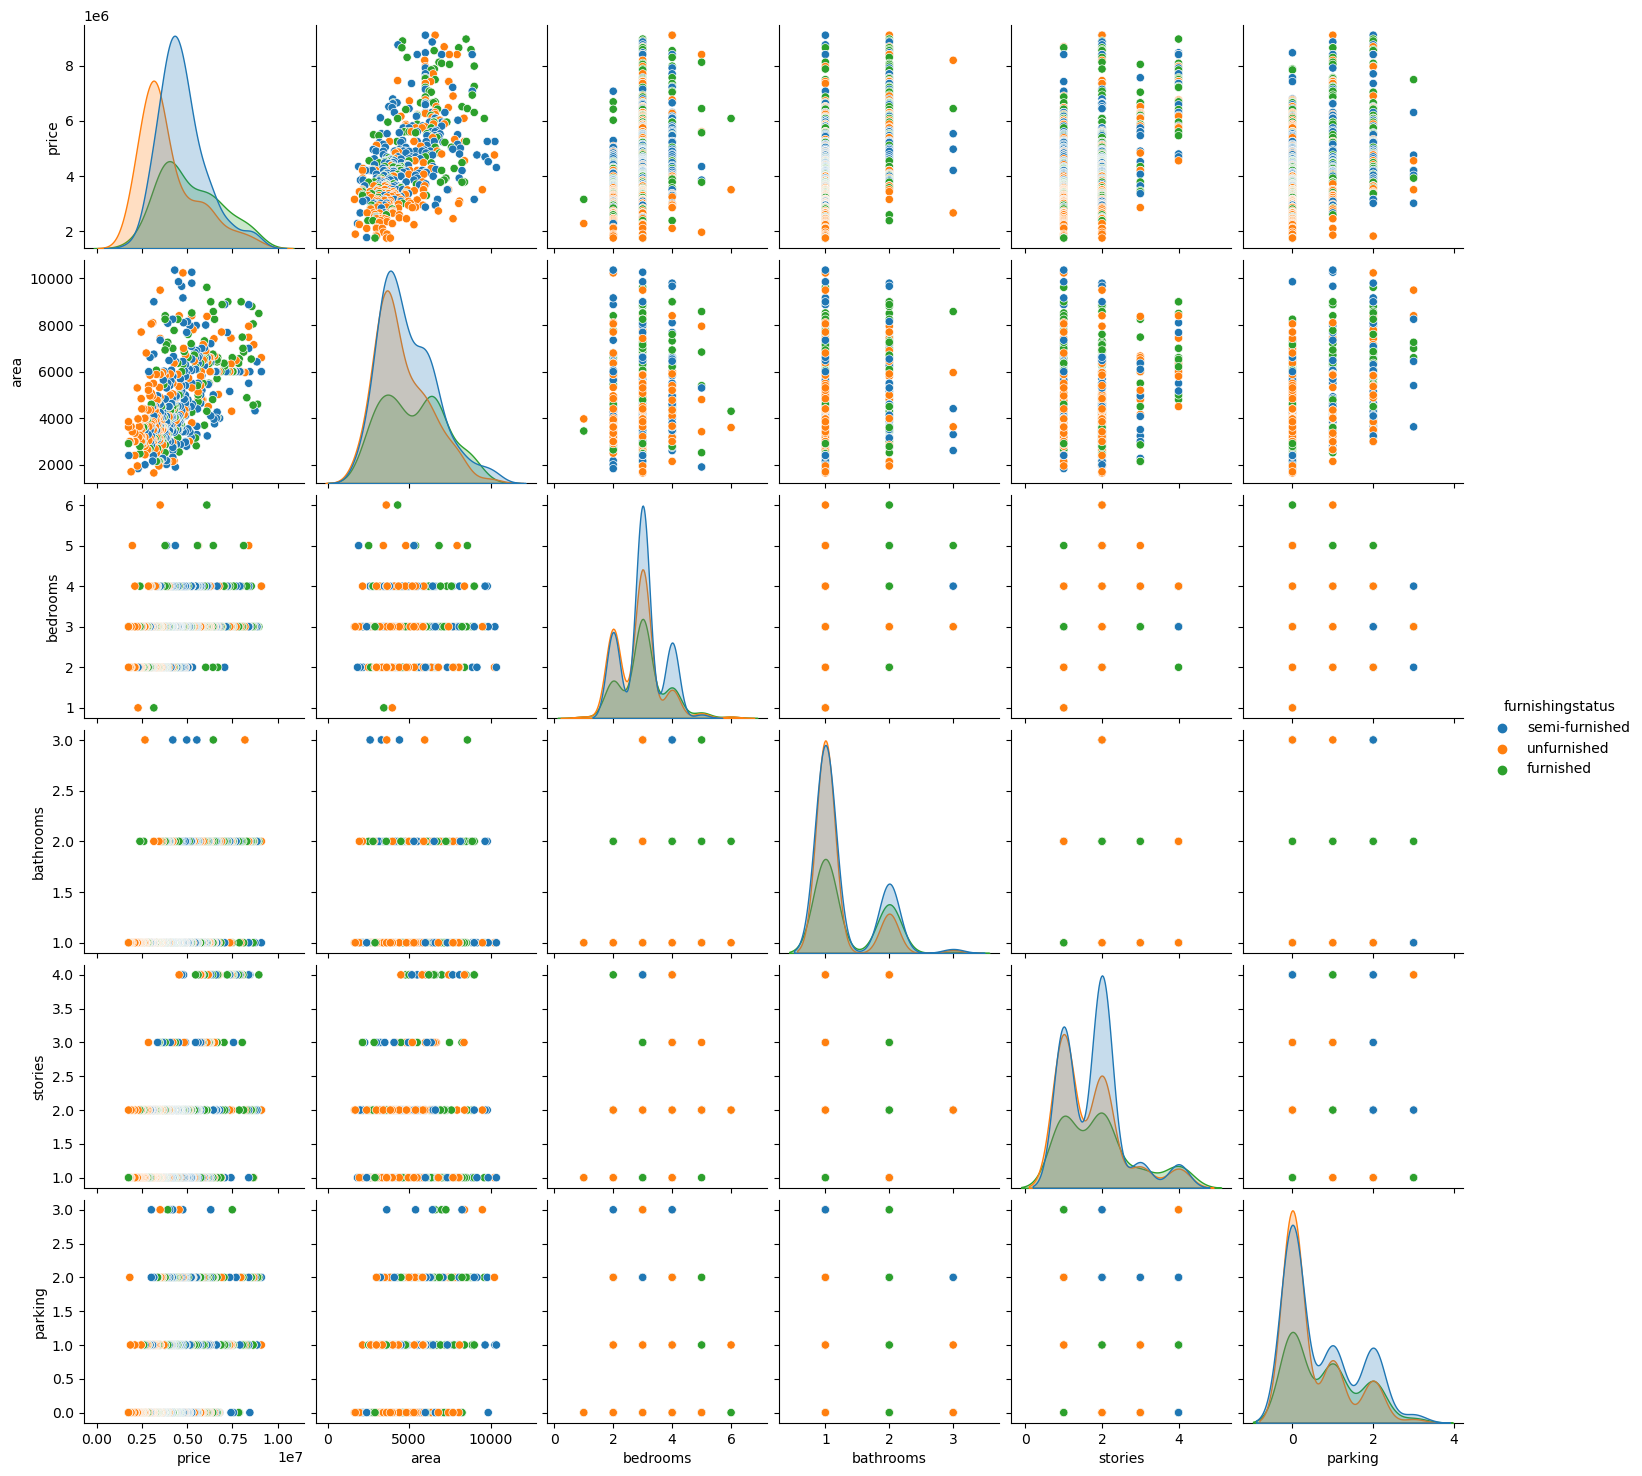

In [19]:
sb.pairplot(data,hue='furnishingstatus')

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [21]:
dummy=pd.get_dummies(data[cat.columns],drop_first=True)
dummy=dummy.astype('int')

In [22]:
data=data.drop(columns=cat.columns,axis=1)
df=pd.concat([data,dummy],axis=1)
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,1,0,1,0,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,1,0,1,1,0,1
17,8960000,8500,3,2,4,2,1,0,0,0,1,0,0,0
18,8890000,4600,3,2,2,2,1,1,0,0,1,0,0,0
19,8855000,6420,3,2,2,1,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [23]:
df.reset_index(drop=True,inplace=True)

In [24]:
x=df.drop('price',axis=1)
y=df['price']

In [25]:
sc=StandardScaler()
sc.fit(x)
x=sc.fit_transform(x)

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3)

In [27]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [28]:
score=lr.score(xtest,ytest)
score

0.6158129548822179

In [29]:
pred=lr.predict(xtest)

In [30]:
mse=mean_squared_error(ytest,pred)
mae=mean_absolute_error(ytest,pred)
r2=r2_score(ytest,pred)
print(f"""Mean Absolute error:{mae}
Mean Squared Error: {mse}
r2 Score: {r2}""")

Mean Absolute error:726670.3227082747
Mean Squared Error: 922686088102.6927
r2 Score: 0.6158129548822179
